<a href="https://colab.research.google.com/github/wayne540500/CNN_PyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [28]:
class Model(nn.Module):
  # building layer
  def __init__(self, input_features = 4, h1 = 8, h2 = 9, output_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)
  # from layer1 -> layer2 -> output
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# pick a manual seed for random
torch.manual_seed(33)
# create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_dataframe = pd.read_csv(url)

In [6]:
my_dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# 把文字換成數字 比較好處理
my_dataframe['species'] = my_dataframe['species'].replace('setosa', 0.0)
my_dataframe['species'] = my_dataframe['species'].replace('versicolor', 1.0)
my_dataframe['species'] = my_dataframe['species'].replace('virginica', 2.0)
my_dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# train test split
X = my_dataframe.drop('species', axis = 1) # 去掉specices 因為要當成判斷結果output
Y = my_dataframe['species'] # output

In [9]:
# convert these to numpy array 去掉表格的敘述 剩下數字
X = X.values
Y = Y.values

In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
# inorder to use numpy we need to import this sklearn
from sklearn.model_selection import train_test_split

In [15]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [16]:
# convert X features to float tensor
X_train = torch.FloatTensor(X_train)  # 用float是因為data是有小數點的
X_test = torch.FloatTensor(X_test)  # 用float是因為data是有小數點的

In [17]:
# convert Y labels to long tensor
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [19]:
# set error tolerance
criterion = nn.CrossEntropyLoss()
# choose optimizer & learning rate(if error doesn't go down after a lot of iterations(epoch), we want to lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



In [20]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [29]:
# train model
# epochs?
epochs = 100
loses = []
for i in range(epochs):
  # go forward and get prediction
  Y_pred = model.forward(X_train) # get prediction result

  # measure the loss
  loss = criterion(Y_pred, Y_train) # predict value vs train

  # keep track of losses
  loses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  # backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 and loss: 1.1880278587341309
epoch: 10 and loss: 1.0545216798782349
epoch: 20 and loss: 0.9283751845359802
epoch: 30 and loss: 0.656653106212616
epoch: 40 and loss: 0.4490240812301636
epoch: 50 and loss: 0.32752886414527893
epoch: 60 and loss: 0.21238763630390167
epoch: 70 and loss: 0.12857429683208466
epoch: 80 and loss: 0.08929705619812012
epoch: 90 and loss: 0.07297828048467636


Text(0.5, 0, 'epoch')

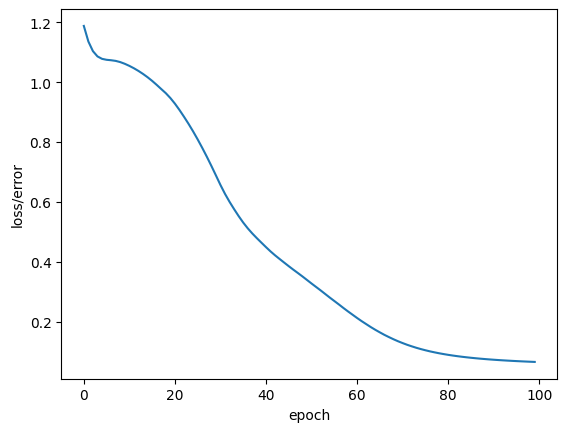

In [31]:
# graph it out
plt.plot(range(epochs), loses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [32]:
# evaluate model on test data set
with torch.no_grad():  # turn off backpropagation
  Y_evaluate = model.forward(X_test)  # X_test are features from our test set, Y_evaluate will be prediction
  loss = criterion(Y_evaluate, Y_test)  # find the error or loss


In [33]:
loss

tensor(0.0692)

In [37]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    Y_val = model.forward(data)
    # will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(Y_val)} \t {Y_test[i]}')

    # correct or not
    if Y_val.argmax().item() == Y_test[i]:
      correct += 1

print(f'we got {correct} correct')

1.) tensor([-2.0800,  4.3111, -1.1826]) 	 1
2.) tensor([-1.8119,  4.9008, -1.8182]) 	 1
3.) tensor([ 10.9045,   5.3399, -12.3725]) 	 0
4.) tensor([-3.5184,  3.8714,  0.7172]) 	 1
5.) tensor([-6.2254,  2.1951,  4.8639]) 	 2
6.) tensor([-9.6186,  0.9250,  9.5116]) 	 2
7.) tensor([ 11.0151,   5.5096, -12.5470]) 	 0
8.) tensor([ 11.7352,   5.6532, -13.2854]) 	 0
9.) tensor([-6.2420,  2.6067,  4.5606]) 	 2
10.) tensor([-8.0338,  1.9554,  7.0257]) 	 2
11.) tensor([-8.5780,  1.6329,  7.8457]) 	 2
12.) tensor([ 10.6129,   5.0914, -12.0110]) 	 0
13.) tensor([-8.0860,  1.7718,  7.2138]) 	 2
14.) tensor([-3.4310,  3.8006,  0.6453]) 	 1
15.) tensor([-6.7703,  2.5368,  5.2698]) 	 2
16.) tensor([-1.8591,  4.6867, -1.6528]) 	 1
17.) tensor([-4.9603,  3.0149,  2.9225]) 	 2
18.) tensor([ 11.9254,   5.7130, -13.4909]) 	 0
19.) tensor([-3.2332,  4.2259,  0.0824]) 	 1
20.) tensor([-6.8102,  2.7440,  5.0270]) 	 2
21.) tensor([ 11.1746,   5.3678, -12.6475]) 	 0
22.) tensor([ 12.4277,   6.0774, -14.0946]) 	 